**Name**: Anirudh Rao

**Roll No.**: BE21B004



---



In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

# Task 1

First, we have to create our dummy binary classifier. We will build upon `sklearn`'s `BaseEstimator` class to create our classifier. Our dummy classifier randomly returns a prediction based on one of 3 methods - **Bernoulli**, **normal**, and **uniform**. The prediction also depends on a pre-defined **threshold** $p \in [0,1]$.

**Bernoulli** - Returns `True` with probability $p$ and `False` with probability $1-p$.

**Normal** - Randomly samples a number $n$ from a Gaussian distribution with $\mu=0.5$ and $\sigma=0.2$ and returns `True` if $n < p$ and `False` otherwise. This value of $\sigma$ was chosen to ensure that the classifier almost always returns `False` when $p=0$ and almost always returns `True` when $p=1$.

**Uniform** - Randomly samples a number $n$ from a uniform distribution between $0$ and $1$ and returns `True` if $n < p$ and `False` otherwise.

In [2]:
# Importing sklearn's BaseEstimator class

from sklearn.base import BaseEstimator

In [3]:
# Setting a random seed for replicability

random.seed(5401)


# Defining the DummyBinaryClassifier class

class DummyBinaryClassifier(BaseEstimator):

    def __init__(self, method="bernoulli", p=0.5):

        # Defining the attributes of the classifier

        self.method = method  # Method
        self.p = p  # Threshold

    def fit(self, data):

        # Defining a dummy fit function

        pass

    def predict(self, data):

        # Returning a prediction (with the same size as the input data) based on the defined method and threshold

        # Bernoulli

        if self.method == "bernoulli":
            return random.choices(population=[True, False], weights=[self.p, 1 - self.p], k=len(data))

        # Normal

        elif self.method == "normal":
            predictions = []
            for i in range(len(data)):
                if random.gauss(mu=0.5, sigma=0.2) < self.p:
                    predictions.append(True)
                else:
                    predictions.append(False)
            return predictions

        # Uniform

        elif self.method == "uniform":
            predictions = []
            for i in range(len(data)):
                if random.uniform(0, 1) < self.p:
                    predictions.append(True)
                else:
                    predictions.append(False)
            return predictions

Now we wish to check the probability with which each of the methods returns `True` for different values of $p$. For this, we create dummy data with $100$ instances. We scan through values of $p$ from $0$ to $1$ in steps of $0.1$ and compute the fraction of times the classifier returns `True`. These fractions are then visualized as a line plot.

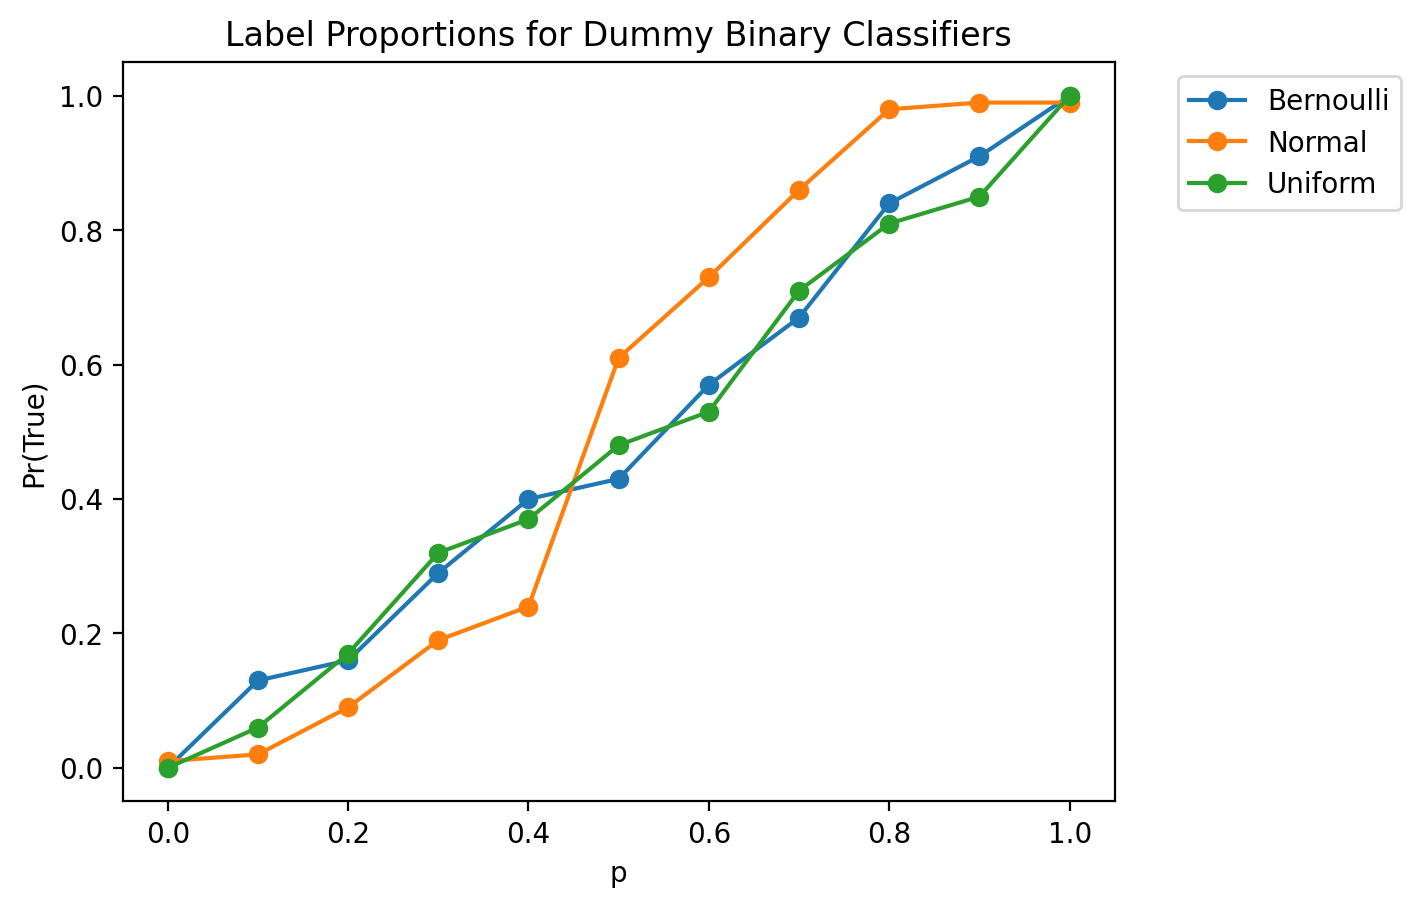

In [4]:
# Defining the dummy data

dummy_data = np.zeros(100)

# Defining the range of p values

p_values = np.arange(0, 1.1, 0.1)

# Storing the values of Pr(True) for different classifiers and for different values of p

bernoulli_trues = []
normal_trues = []
uniform_trues = []

# Iterating through the different p values

for p in p_values:
    
    # Instantiating the classifiers

    bernoulli_classifier = DummyBinaryClassifier(method="bernoulli", p=p)
    normal_classifier = DummyBinaryClassifier(method="normal", p=p)
    uniform_classifier = DummyBinaryClassifier(method="uniform", p=p)

    # Making predictions on the dummy data and recording the fraction of Trues returned

    bernoulli_trues.append(np.mean(bernoulli_classifier.predict(data=dummy_data)))
    normal_trues.append(np.mean(normal_classifier.predict(data=dummy_data)))
    uniform_trues.append(np.mean(uniform_classifier.predict(data=dummy_data)))

# Visualizing the fractions as a line plot

plt.figure(dpi=200)
plt.plot(p_values, bernoulli_trues, label="Bernoulli", marker="o")
plt.plot(p_values, normal_trues, label="Normal", marker="o")
plt.plot(p_values, uniform_trues, label="Uniform", marker="o")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel("p")
plt.ylabel("Pr(True)")
plt.title("Label Proportions for Dummy Binary Classifiers")
plt.show()

We can see that all the three classifiers show a similar behaviour. When $p=0$, they always return `False`. When $p=1$, they always return `True`. It can be expected that they will all become straight lines if the number of samples is increased beyond $100$.

# Task 2

We now test our Bernoulli classifier on the Iris dataset. As all 3 classes have the same number of instances, we randomly pick 'Class 0' as `True` and the rest as `False`.

In [5]:
from sklearn.datasets import load_iris

iris_dataset = load_iris()

data = iris_dataset["data"]
features = iris_dataset["feature_names"]
labels = iris_dataset["target"]

df = pd.DataFrame(data,columns=features)
df["class"] = labels
df["class"] = df["class"].apply(lambda x: True if x == 0 else False)

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,True
1,4.9,3.0,1.4,0.2,True
2,4.7,3.2,1.3,0.2,True
3,4.6,3.1,1.5,0.2,True
4,5.0,3.6,1.4,0.2,True


**1.**

The distribution of labels in the modified Iris dataset is shown below:

In [7]:
df["class"].value_counts()

class
False    100
True      50
Name: count, dtype: int64

$50$ instances are labelled `True` and $100$ instances are labelled `False`.

**2.**

We compute the performance of the Bernoulli classifier on the binary IRIS dataset for different values of $p$ using the following metrics - precision, recall, and F1-score. These metrics are then reported as a line plot.

We also compute the true positive rate and false positive rate for subsequent tasks.

In [8]:
# Defining the features and the label

X = df.drop(columns=["class"])
y = df["class"]

In [9]:
# Importing the performance metrics

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

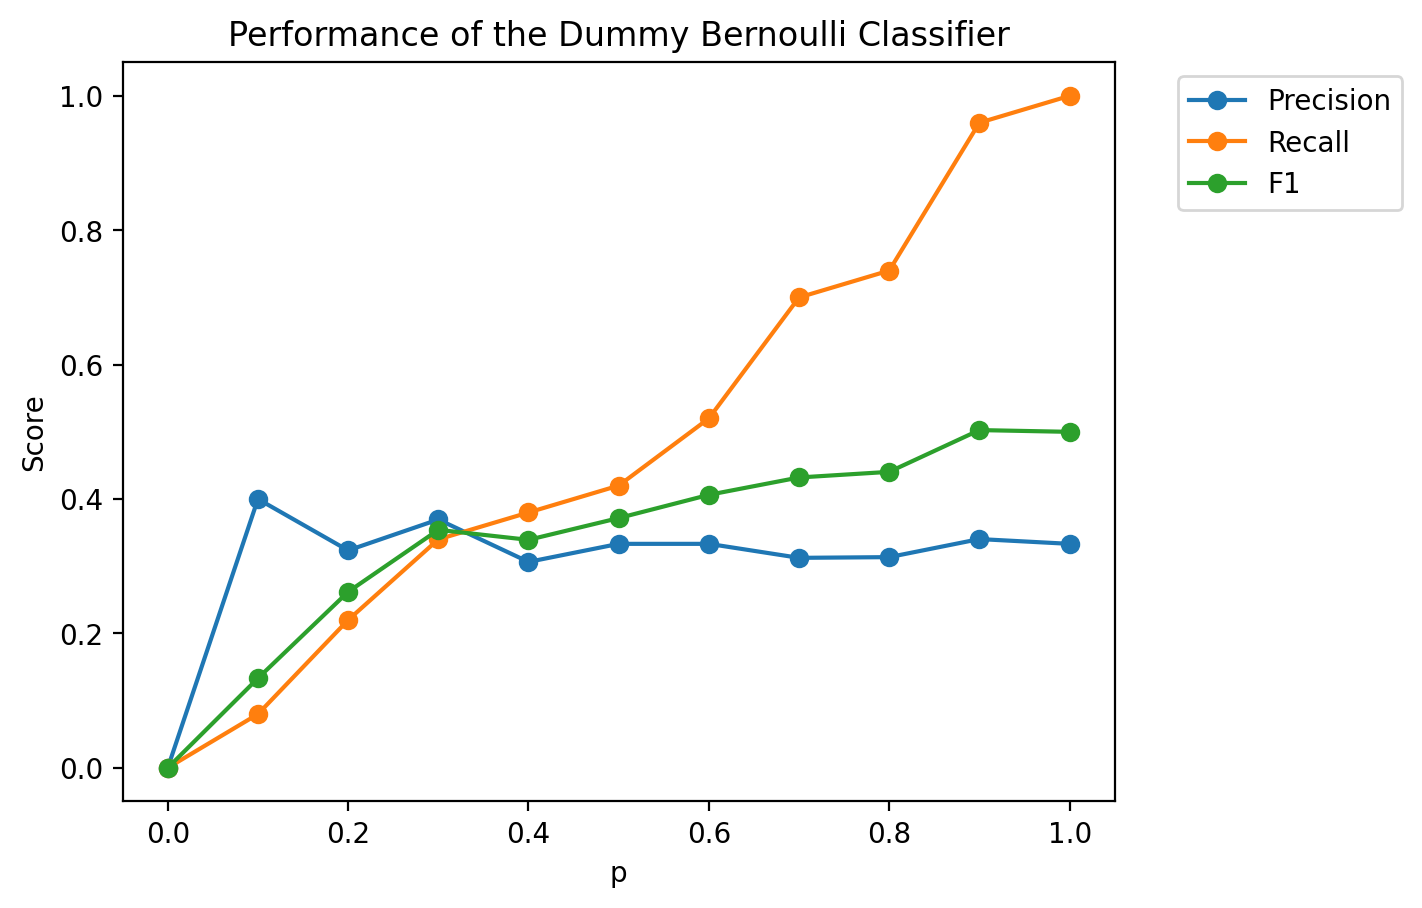

In [10]:
# Computing the metrics for different values of p

precisions = []
recalls = []
f1s = []
tprs = []
fprs = []

for p in p_values:
    # Precision, recall, F1-score

    bernoulli_classifier = DummyBinaryClassifier(method="bernoulli", p=p)
    bernoulli_classifier.fit(data=X)
    predictions = bernoulli_classifier.predict(data=X)
    precisions.append(precision_score(y_true=y, y_pred=predictions, zero_division=0))
    recalls.append(recall_score(y_true=y, y_pred=predictions))
    f1s.append(f1_score(y_true=y, y_pred=predictions))

    # TPR and FPR

    conf_matrix = confusion_matrix(y_true=y, y_pred=predictions)
    tp = conf_matrix[0, 0]
    tn = conf_matrix[1, 1]
    fp = conf_matrix[1, 0]
    fn = conf_matrix[0, 1]
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    tprs.append(tpr)
    fprs.append(fpr)

# Visualizing the performance metrics

plt.figure(dpi=200)
plt.plot(p_values, precisions, label="Precision", marker="o")
plt.plot(p_values, recalls, label="Recall", marker="o")
plt.plot(p_values, f1s, label="F1", marker="o")
plt.title("Performance of the Dummy Bernoulli Classifier")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.xlabel("p")
plt.ylabel("Score")
plt.show()

We can see that the recall $=\frac{TP}{TP+FN}$ increases from $0$ to $1$ as $p$ is increased. This is because all the predictions are `True` and there are no false negatives when $p=1$. The precision does not increase beyond a point as the ratio $\frac{TP}{TP+FP}$ remains constant ($TP$ decreases and $FP$ increases). The F1-score is a function of the precision and recall.



**3.**

We plot the relation between the precision and recall based on the values computed earlier.

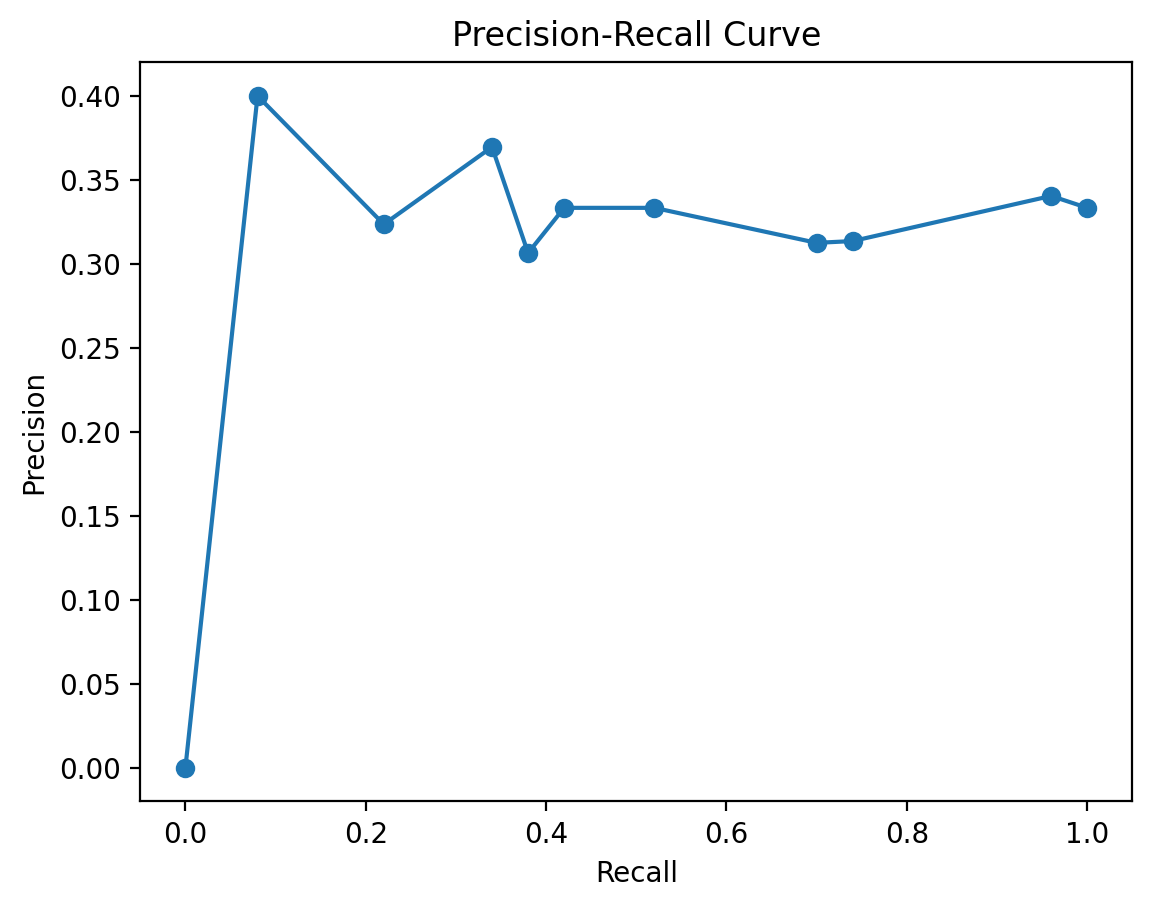

In [11]:
# Visualize the PRC

plt.figure(dpi=200)
plt.title("Precision-Recall Curve")
plt.plot(recalls,precisions,marker="o")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

We can see that the precision stays constant even as the recall increases.

**4.**

We plot the ROC curve, the relation between the TPR and FPR.

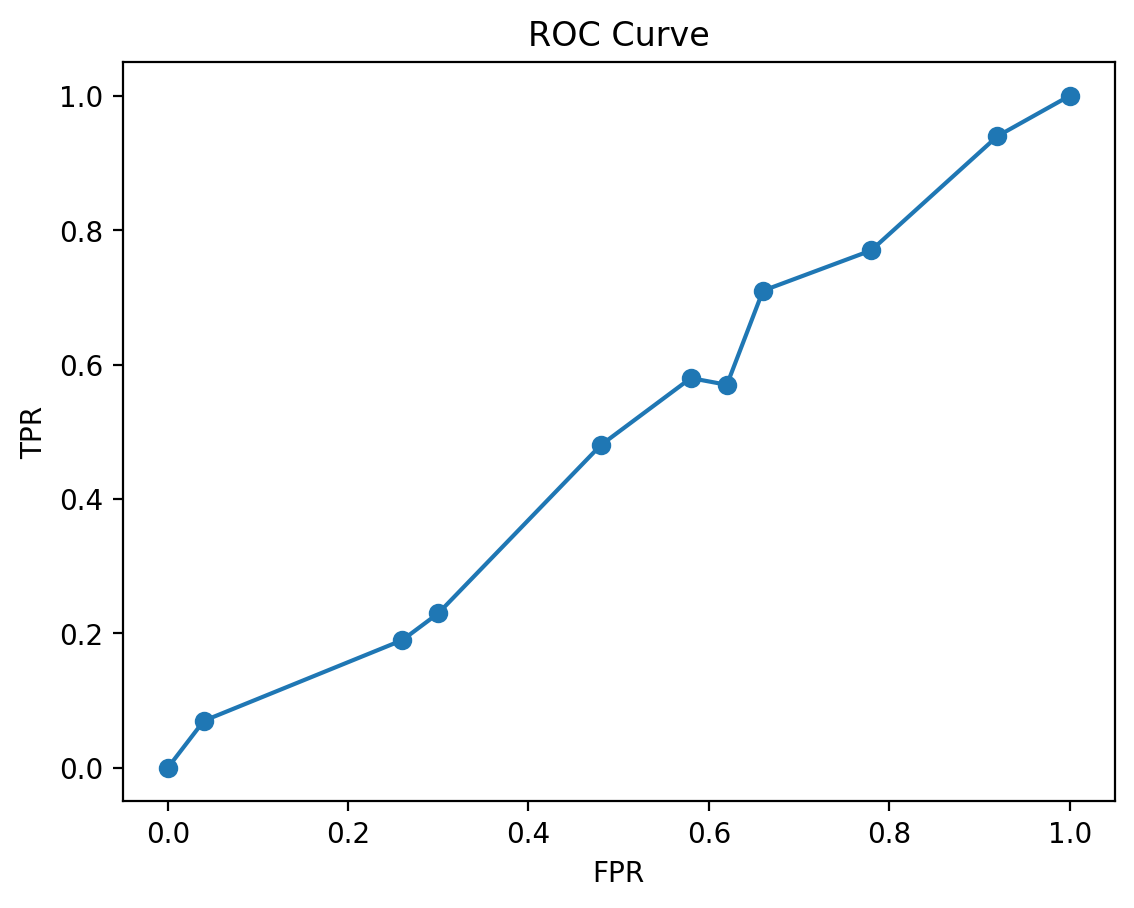

In [12]:
# Visualize the ROC curve

plt.figure(dpi=200)
plt.plot(fprs,tprs,marker="o")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.show()

We can see that the TPR and FPR increase in tandem from $0$ to $1$.

**5.**

Finally, we compute the area under the PRC and the ROC curve.

In [13]:
from sklearn.metrics import auc

In [14]:
auprc = auc(recalls,precisions)
auroc = auc(fprs,tprs)
print(f"AUPRC: {auprc}")
print(f"AUROC: {auroc}")

AUPRC: 0.3239418031168548
AUROC: 0.49


The AUPRC in this case is almost equal to the fraction of True's in the dataset $=\frac{50}{50+100} = 0.33$. This confirms the fact that our classifier returns predictions randomly.

The AUROC in this case is almost equal to $0.5$. This again indicates that the classifier returns predictions based on random chance.

# Task 3

We now visualise the **decision boundaries** of the 3 classifiers for different values of the threshold $p$. We convert the first 2 features of the IRIS dataset into a 2D grid and have the classifiers make predictions for these points. Points classified as `True` are coloured in red and those classified as `False` are coloured in blue. For reference, we also plot the original datapoints with their corresponding colour based on their class.

In [15]:
# Importing the colors library to visualise the decision boundary

import matplotlib.colors as colors

In [16]:
# Creating a grid of datapoints

X_1, X_2 = np.meshgrid(np.linspace(data[:, 0].min(), data[:, 0].max(),100),
                       np.linspace(data[:, 1].min(), data[:, 1].max(),100))
grid = np.array([X_1.reshape(-1), X_2.reshape(-1)]).T

In [17]:
# Creating a range of p values from 0 to 1 in steps of 0.25

p_values = np.arange(0,1.1,0.25)

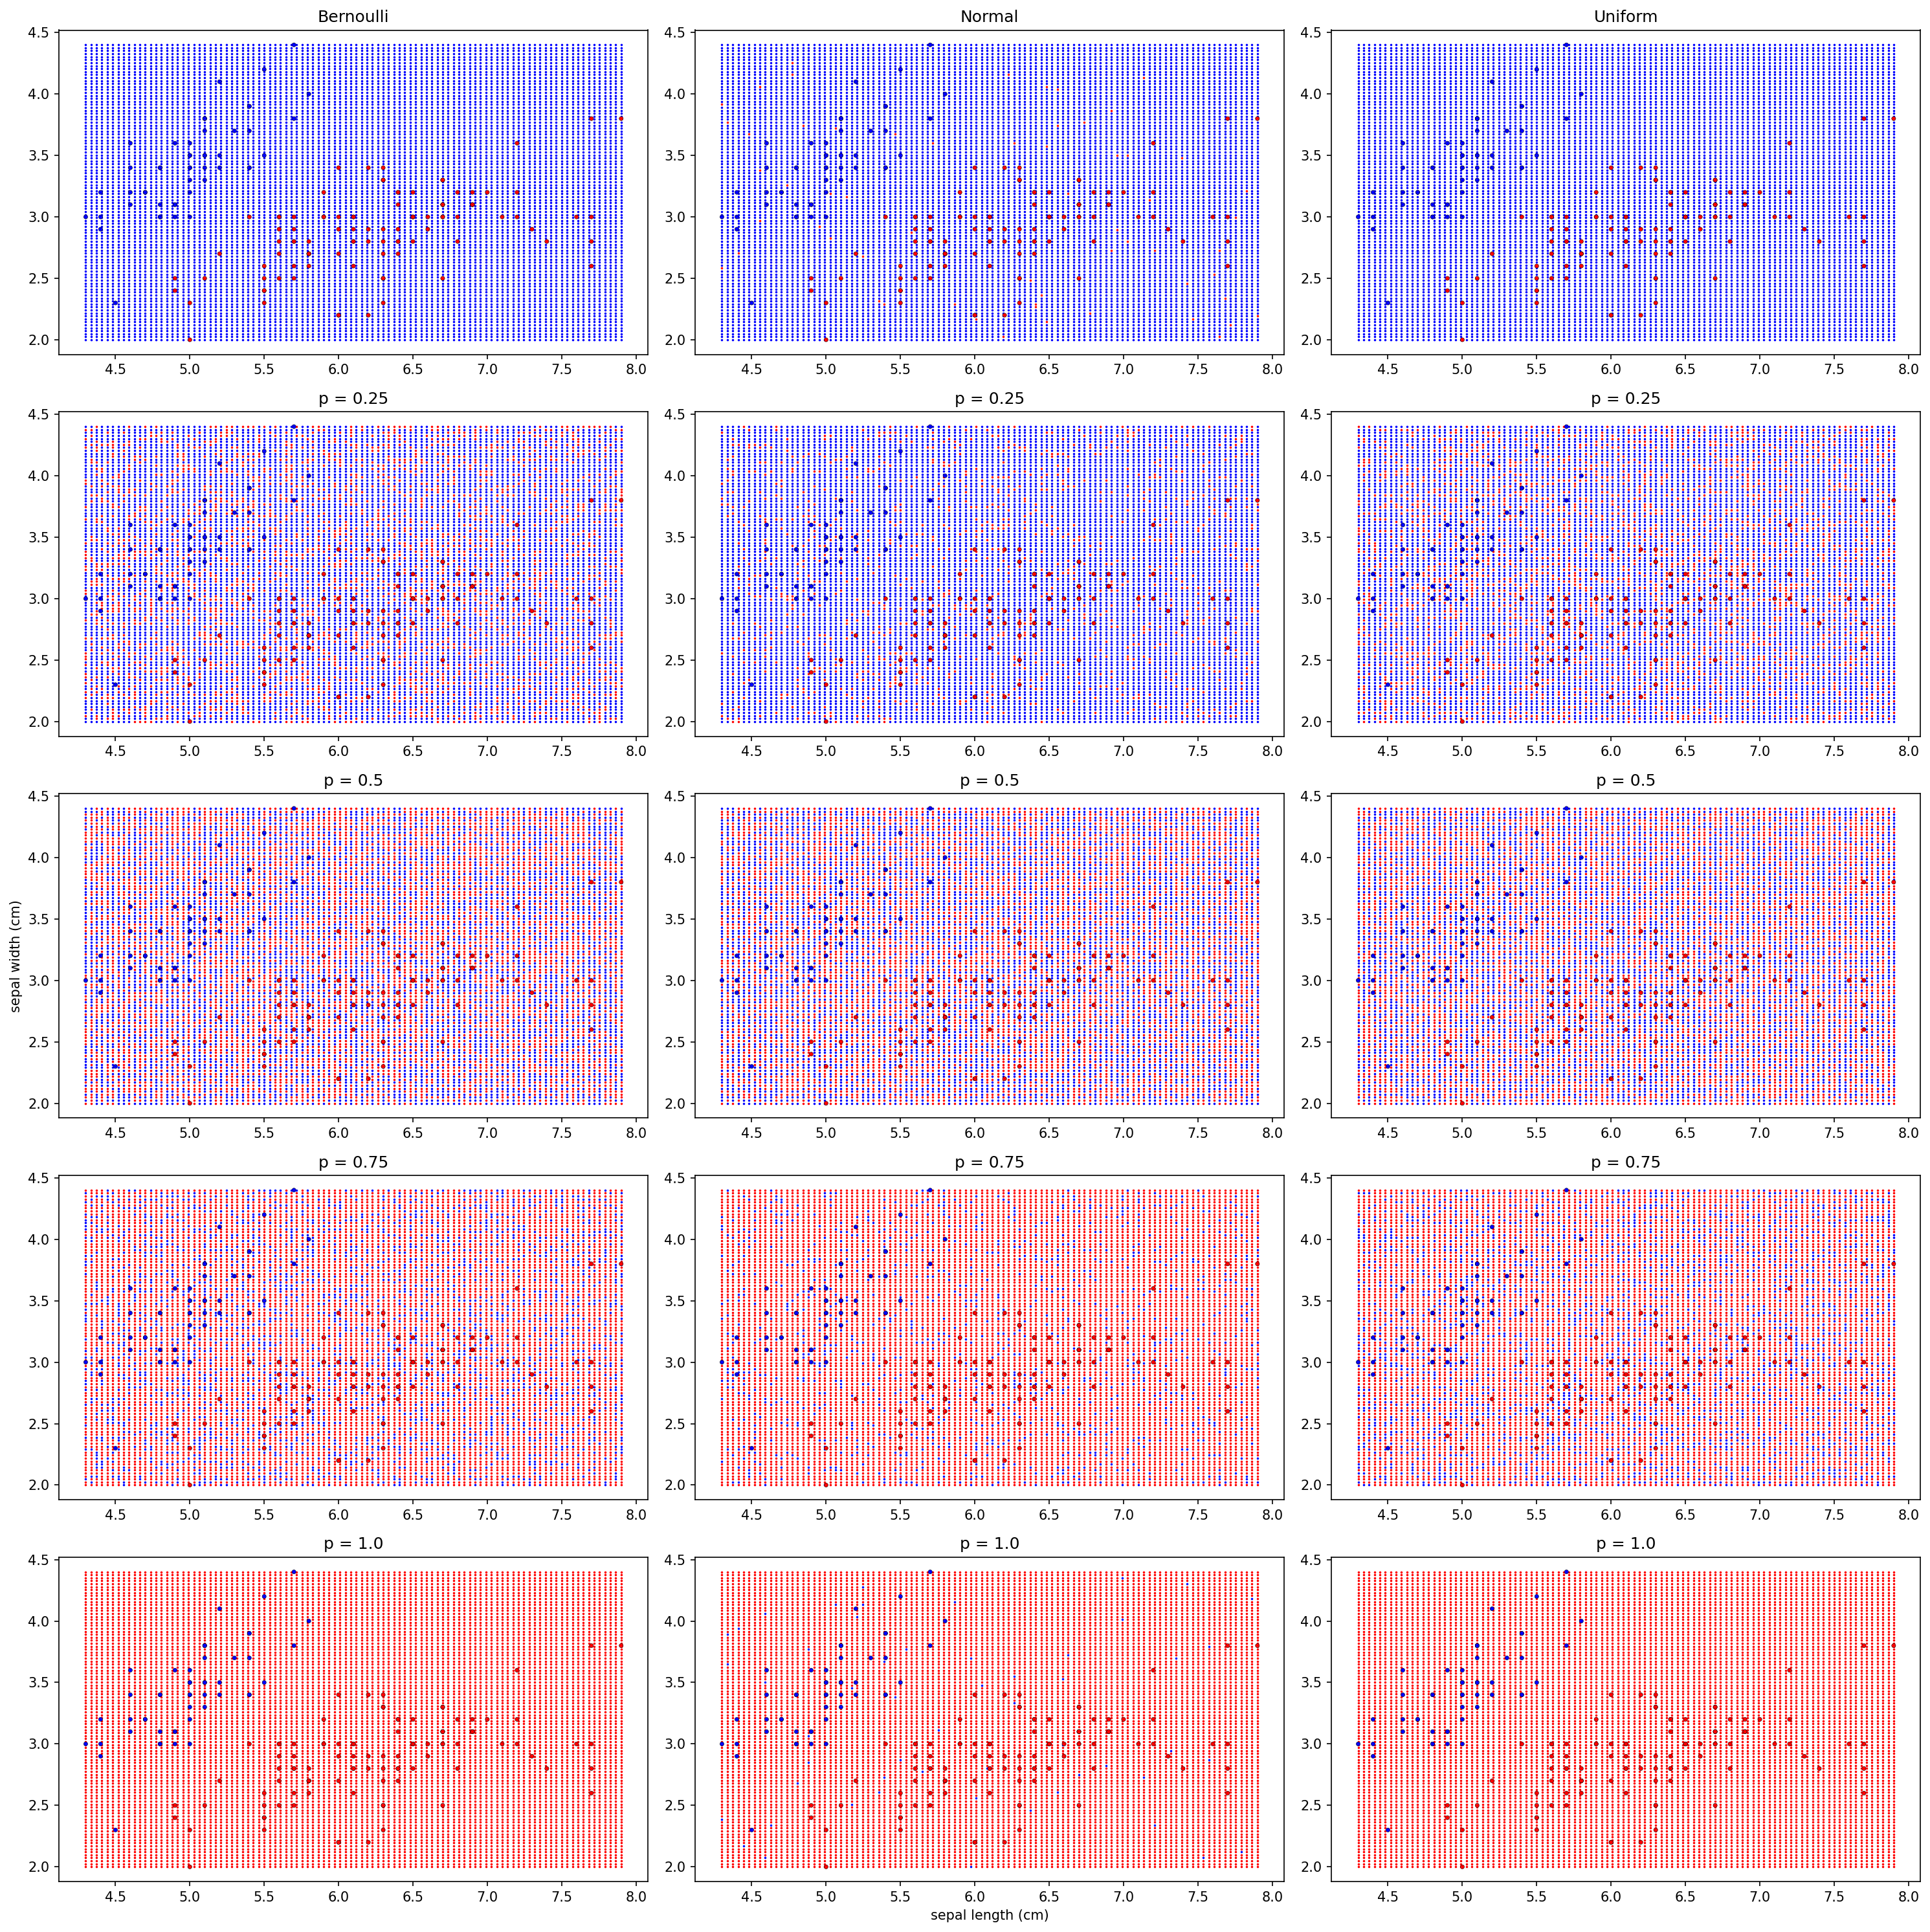

In [18]:
# Visualising the decision boundaries for all 3 classifiers for the different values of p

fig, ax = plt.subplots(5, 3, dpi=150, figsize=(20, 20))

i = 0
for method in ["bernoulli", "normal", "uniform"]:
    j = 0
    for p in p_values:
        classifier = DummyBinaryClassifier(method=method, p=p)
        classifier.fit(data=grid)
        y_pred = np.reshape(classifier.predict(grid), X_1.shape)
        ax[j, i].scatter(X_1[y_pred == True], X_2[y_pred == True], marker='.', s=2, c="red")
        ax[j, i].scatter(X_1[y_pred == False], X_2[y_pred == False], marker='.', s=2, c="blue")
        ax[j, i].scatter(data[:, 0], data[:, 1], marker='.', c=y, cmap=colors.ListedColormap(['red', 'blue']),
                         edgecolors='black', linewidth=0.25)
        ax[j, i].set_title(f"p = {p}")
        j += 1
    i += 1

for axis, method in zip(ax[0], ["Bernoulli", "Normal", "Uniform"]):
    axis.set_title(method)

ax[4][1].set_xlabel(features[0])
ax[2][0].set_ylabel(features[1])

plt.tight_layout()
plt.show()

When $p=0$, all classifiers return `False`. When $p=1$, all classifiers return `True`. As $p$ increases, so does the number of points predicted as `True`. However, there is no clear decision boundary for intermediate values of $p$. The classifiers randomly predict points as `True` or `False`. This is especially clear when $p=0.5$.